In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tsfel

In [3]:
# Load data
x_train_sig = list(np.loadtxt('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype='float32'))
x_test_sig = list(np.loadtxt('UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', dtype='float32'))
y_test = np.loadtxt('UCI HAR Dataset/test/y_test.txt')
y_train = np.loadtxt('UCI HAR Dataset/train/y_train.txt')
activity_labels = np.array(pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delimiter=' '))[:,1]
fs = 100

In [4]:
# Feature Extraction
cfg_file = tsfel.get_features_by_domain()                # All features 
# cfg_file = tsfel.get_features_by_domain('statistical') # Only statistical features
# cfg_file = tsfel.get_features_by_domain('temporal')    # Only temporal features
# cfg_file = tsfel.get_features_by_domain('spectral')    # Only spectral features

# Get features
X_train = tsfel.time_series_features_extractor(cfg_file, x_train_sig, fs=fs)
X_test = tsfel.time_series_features_extractor(cfg_file, x_test_sig, fs=fs)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [5]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(X_train)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(X_train)
X_test = selector.transform(X_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)

In [6]:
# Random Forest Classifier

# Train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(nX_train, y_train.ravel())

# Predict the labels
y_pred = rf_clf.predict(nX_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred, target_names=activity_labels)
print(rf_report)
print("Accuracy: {:.2f}%".format(rf_accuracy*100))

                    precision    recall  f1-score   support

           WALKING       0.85      0.96      0.90       496
  WALKING_UPSTAIRS       0.83      0.85      0.84       471
WALKING_DOWNSTAIRS       0.92      0.76      0.83       420
           SITTING       0.72      0.47      0.57       491
          STANDING       0.63      0.83      0.72       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.82      2947
         macro avg       0.83      0.81      0.81      2947
      weighted avg       0.83      0.82      0.81      2947

Accuracy: 81.81%


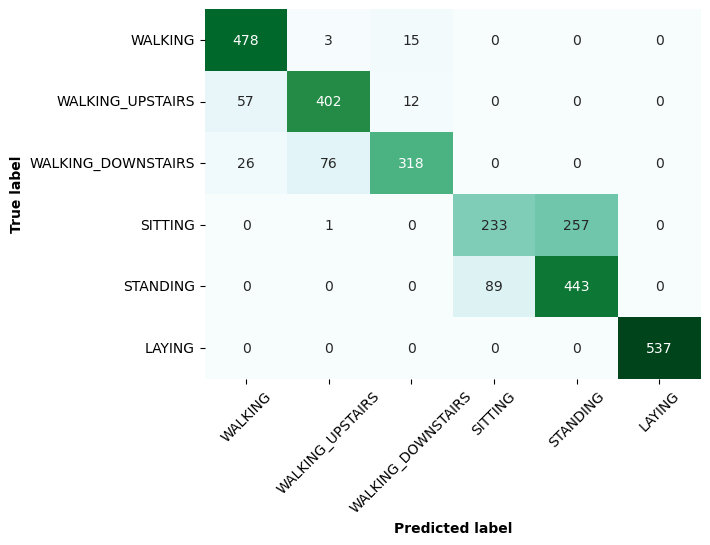

In [7]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('True label', fontweight='bold', fontsize = 10)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 10)
bottom, top = ax.get_ylim()
plt.show()

In [8]:
# Decision Tree Classifier

# Train the model
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(nX_train, y_train.ravel())

# Predict the labels
y_pred = dt_clf.predict(nX_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
dt_report = classification_report(y_test, y_pred, target_names=activity_labels)
print(dt_report)
print("Accuracy: {:.2f}%".format(dt_accuracy*100))

                    precision    recall  f1-score   support

           WALKING       0.80      0.91      0.85       496
  WALKING_UPSTAIRS       0.76      0.77      0.76       471
WALKING_DOWNSTAIRS       0.85      0.71      0.77       420
           SITTING       0.58      0.58      0.58       491
          STANDING       0.61      0.61      0.61       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.77      2947
         macro avg       0.77      0.76      0.76      2947
      weighted avg       0.77      0.77      0.77      2947

Accuracy: 76.69%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


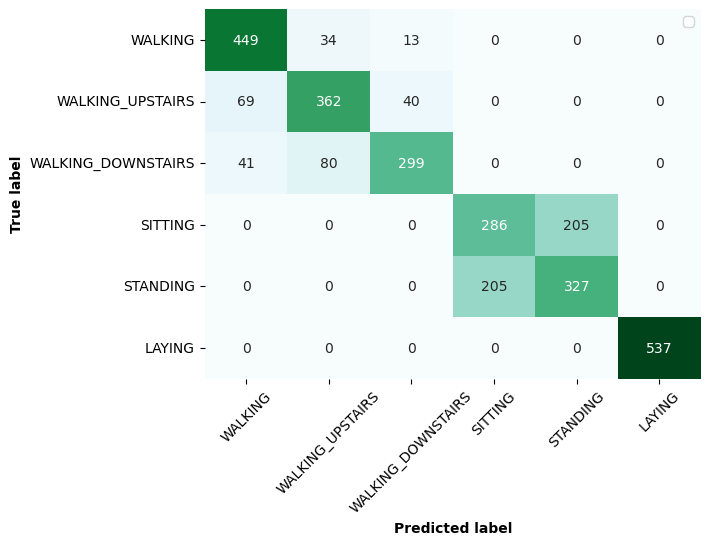

In [9]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('True label', fontweight='bold', fontsize = 10)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 10)
bottom, top = ax.get_ylim()
plt.legend()
plt.show()

In [10]:
# Linear Regression (not suitable for classification, just for demonstration)
# Convert class labels to integer values

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train the model
lr_clf = LinearRegression()
lr_clf.fit(nX_train, y_train.ravel())

# Predict the labels
y_pred = lr_clf.predict(nX_test)

# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy: {:.2f}%".format(lr_accuracy*100))
print("Mean Squared Error: {:.2f}".format(np.mean((y_test - y_pred)**2)))   # Mean Squared Error

Accuracy: 65.15%
Mean Squared Error: 0.26


In [11]:
# Print the evaluation results
print("Decision Tree Accuracy:", "{:.2f}".format(dt_accuracy*100) + "%")
print("Decision Tree Report:\n", dt_report)

print("\nRandom Forest Accuracy:", "{:.2f}".format(rf_accuracy*100) + "%")
print("Random Forest Report:\n", rf_report)

print("\nLinear Regression Accuracy (not suitable for classification):", "{:.2f}".format(lr_accuracy*100) + "%")
print("Mean Squared Error:", np.mean((y_test - y_pred)**2))   # Mean Squared Error

Decision Tree Accuracy: 76.69%
Decision Tree Report:
                     precision    recall  f1-score   support

           WALKING       0.80      0.91      0.85       496
  WALKING_UPSTAIRS       0.76      0.77      0.76       471
WALKING_DOWNSTAIRS       0.85      0.71      0.77       420
           SITTING       0.58      0.58      0.58       491
          STANDING       0.61      0.61      0.61       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.77      2947
         macro avg       0.77      0.76      0.76      2947
      weighted avg       0.77      0.77      0.77      2947


Random Forest Accuracy: 81.81%
Random Forest Report:
                     precision    recall  f1-score   support

           WALKING       0.85      0.96      0.90       496
  WALKING_UPSTAIRS       0.83      0.85      0.84       471
WALKING_DOWNSTAIRS       0.92      0.76      0.83       420
           SITTING       0.72      0.47      0.

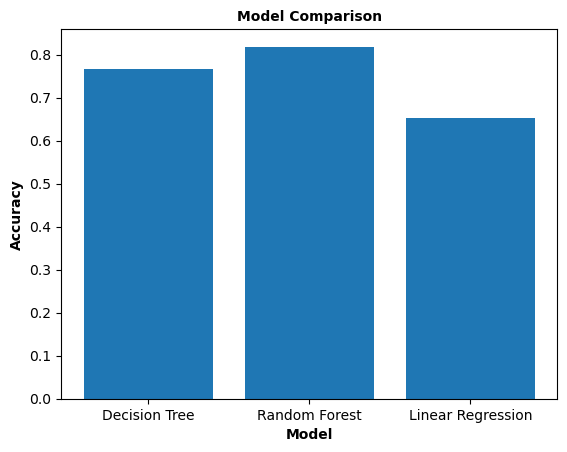

In [12]:
# Plot the results
plt.figure()
plt.bar(['Decision Tree', 'Random Forest', 'Linear Regression'], [dt_accuracy, rf_accuracy, lr_accuracy])
plt.ylabel('Accuracy', fontweight='bold', fontsize = 10)
plt.xlabel('Model', fontweight='bold', fontsize = 10)
plt.title('Model Comparison', fontweight='bold', fontsize = 10)
plt.show()

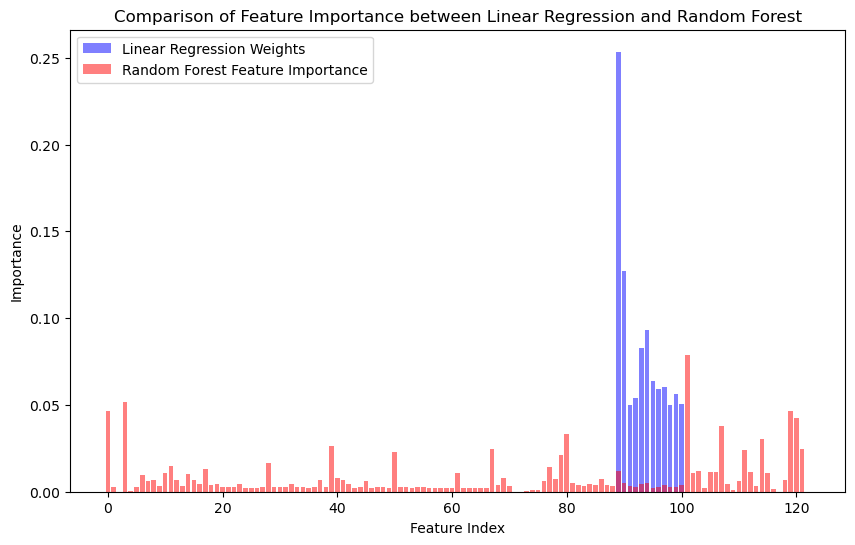

Top 10 Important Features from Linear Regression:
[ 89  90  94  93  95  97  96  99  92 100]

Top 10 Important Features from Random Forest:
[101   3   0 119 120 107  80 114  39 121]
Sum of Feature Importances from Random Forest: 1.0000000000000002


In [20]:
# Obtain feature importances from the Random Forest model
rf_feature_importances = rf_clf.feature_importances_

# Normalize feature importances from Random Forest
rf_feature_importances_normalized = rf_feature_importances / np.sum(rf_feature_importances)

# Normalize weights from Linear Regression
lr_weights_normalized = lr_clf.coef_ / np.sum(np.abs(lr_clf.coef_))

# Plotting
plt.figure(figsize=(10, 6))

# Plotting weights from Linear Regression
plt.bar(np.arange(len(lr_weights_normalized)), lr_weights_normalized, color='b', alpha=0.5, label='Linear Regression Weights')

# Plotting feature importances from Random Forest
plt.bar(np.arange(len(rf_feature_importances_normalized)), rf_feature_importances_normalized, color='r', alpha=0.5, label='Random Forest Feature Importance')

# Setting labels and legend
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Comparison of Feature Importance between Linear Regression and Random Forest')
plt.legend()

# Display the plot
plt.show()

# Get top 10 important features from both models
top_10_lr_features = np.argsort(np.abs(lr_weights_normalized))[-10:][::-1]
top_10_rf_features = np.argsort(rf_feature_importances)[-10:][::-1]

print("Top 10 Important Features from Linear Regression:")
print(top_10_lr_features)

print("\nTop 10 Important Features from Random Forest:")
print(top_10_rf_features)

# Sum of feature importances from Random Forest
print("Sum of Feature Importances from Random Forest:", np.sum(rf_feature_importances))